# Task: 2D symmetric Gaussian kernel

- Load the cu.jpg image in colour
- Define a function that returns a 2d symmetric Gaussian kernel with width sigma over a (2k + 1, 2k + 1) window
- sigma and k should be parameters
- Apply your kernel filter for k = 5 and sigma = 2 to blur the image

-------------------------------------------------------------------------------------------------------
#### Class-room exercise to  develop a 2D symmetric Gaussian kernel
Author: Rajesh Siraskar

Version history
- 04-Dec-2018: First version
- 05-Dec-2018: Improved documentation. Add mean filter understanding

In [2]:
# Jupyter specific command to plot images inline with document
%matplotlib inline

# Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

#### Show original image as a gray-scale image

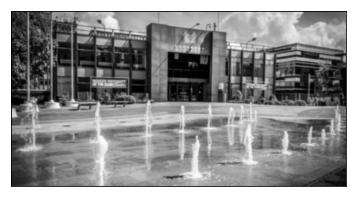

In [7]:
# Show image cu.jpg
image = cv2.imread('cu.jpg', 0)

plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # hide tick values
plt.show()

### Applying filters

- Apply a 'mean' filter kernel
- Kernels are generally square matrices (2D)
- Rows and columns are 'designed' to act as 'masks'
- Once defined a kernel is then 'convoluted' with the original image i.e. kernel gets 'applied'
- Usually done in a sweeping scan like motion (say left to right and top to bottom)

### Apply a simple 'mean' filter
- Define the width 'w' of the filter kernel
- Then simply fill with ones - these will later get multiplied by the image intensities
  when convoluted
- Because we want mean, divide by total squares in the kernel (w*w) 

In [3]:
# Width of the filter
w = 20

# Define the kernel
kernel = np.ones((w, w), np.float32)/(w*w)

# Invoke the OpenCV filter2D() function to convolve the image with the kernel
#   ddepth: -1 indicates depth of original image to be preserved
#   anchor: the relative position of a filtered point within the kernel
#           default value (-1,-1) used. i.e. anchor is at kernel center
filtered_image_mean_kernel = cv2.filter2D(image, -1 ,kernel)

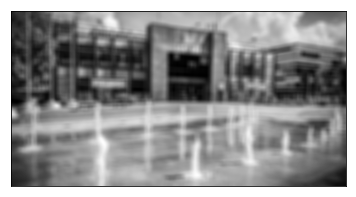

In [4]:
# Show filtered image
plt.imshow(filtered_image_mean_kernel, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # hide tick values
plt.show()

### Gaussian 2D Kernel

- To apply filters we first need to create kernels
- 'kernels' are matrices that act like "masks" that are used to apply over (convolute) an image portion
- We need to develop code to create such 'masks' suitable for the Gaussian 2D kernel function

- 05-Dec-2018: Code developed to create kernels!!
- An example of kernel is shown below. 
- Given the width of window around the pixel to be operated on - we aim to be able to create something like this via code 

[[-2, -2, -2],
 [-1, -1, -1],
 [ 0,  0,  0],
 [ 1,  1,  1],
 [ 2,  2,  2]]

In [3]:
# Building kernels dynamically
k = 2
w = 2*k+1 # dimension of the kernel window

# To iterate through and build a kernel with repeated rows
N = np.arange(-k,k+1,1)

# Build the kernels rows direction (i.e. Y axis)
kernel_Y_2D = [np.repeat(n, w) for n in N]
kernel_Y_2D = np.array(kernel_Y_2D)
print(kernel_Y_2D)

[[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]


In [4]:
# Build the kernels columns direction (i.e. X axis)
# This will simply be a transpose!

kernel_X_2D = kernel_Y_2D.transpose()
print(kernel_X_2D)

[[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]]


## Gaussian kernel function

In [5]:
def Symmetric2DGaussianKernel (k, sigma):

    # Build kernels
    w = 2*k+1 # dimension of the kernel window

    # To iterate through and build a kernel with repeated rows
    N = np.arange(-k, k+1, 1)

    # Build the kernel in rows direction (i.e. Y axis)
    kernel_Y = [np.repeat(n, w) for n in N]
    kernel_Y = np.array(kernel_Y)

    # Build the kernel in columns direction (i.e. X axis)
    kernel_X = kernel_Y.transpose()

    # Compute the Gaussian transform in 2D
    Gxy = 1/(2*np.pi*sigma**2)*(np.exp((-1/(2*sigma**2))*kernel_X**2)*np.exp((-1/(2*sigma**2))*kernel_Y**2))
    
    return Gxy

Call the Symmetric2DGaussianKernel with k=5 and sigma=2 and use OpenCV filter2D function to convolve

In [8]:
# To dramtise the effect higher values of k and sigma were used
k = 10
sigma = 20

Gxy_mask = Symmetric2DGaussianKernel(k=k, sigma=sigma)
filtered_image_Gaussian_kernel = cv2.filter2D(image, -1 , Gxy_mask)

### Comparison: with OpenCV equivalent
Use OpenCV's Gaussian blur with same parameters
OpenCV function takes width of window i.e. 2*k+1

In [9]:
# OpenCV takes window size and hence w=2k+1 i.e. 5 is passed as parameter
w = 2*k+1
filtered_image_OpenCV_Gaussian = cv2.GaussianBlur(image, (w, w), sigma)

### Comparison display: Original image, OpenCV version and custom function all side-by-side

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

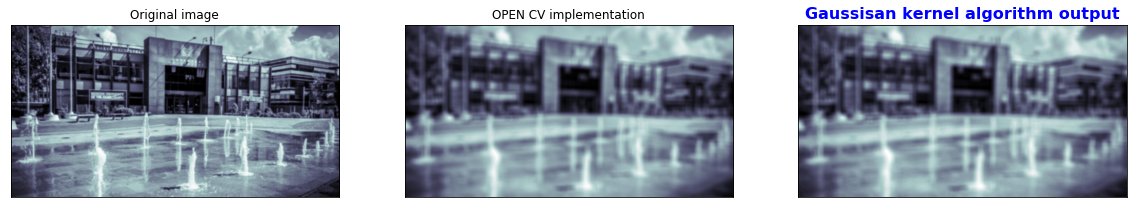

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap = 'bone', interpolation = 'bicubic')
plt.title('Original image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(filtered_image_OpenCV_Gaussian, cmap = 'bone', interpolation = 'bicubic')
plt.title('OPEN CV implementation')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(filtered_image_Gaussian_kernel, cmap = 'bone', interpolation = 'bicubic')
plt.title('Gaussisan kernel algorithm output', color='blue', fontsize=16, fontweight='bold')
plt.xticks([]), plt.yticks([])